In this competition you will work with a challenging time-series dataset
consisting of daily sales data, kindly provided by one of the largest 
Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in 
the next month. By solving this competition you will be able to apply and 
enhance your data science skills. 
http://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/overview/evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
item_categories=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
items=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
sample_submission=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv")
shops=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")

In [12]:
df = pd.read_csv("../input/competitive-data-science-predict-future-sales//sales_train.csv")
df.head()
#test = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


**Data Visualization**

In [15]:
df = pd.merge(train, shops, how='left', left_on = 'shop_id', right_on = 'shop_id')
df = pd.merge(df, items, how='left', left_on='item_id', right_on='item_id')
df = pd.merge(df, item_categories, how='left', left_on='item_category_id', right_on='item_category_id')

Find and plan your top 10 products

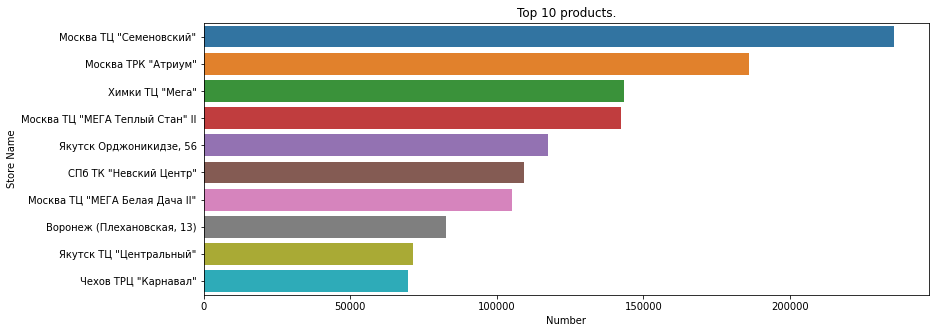

In [19]:
top_10_selling_item = df['shop_name'].value_counts().head(10)
top_10_selling_item = top_10_selling_item.to_frame().reset_index()
top_10_selling_item.columns = ['shop_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_item, x='count', y='shop_name')
plt.title('Top 10 products.')
plt.ylabel('Store Name')
plt.xlabel('Number')
plt.show()

Find and plot top 10 selling categories of products

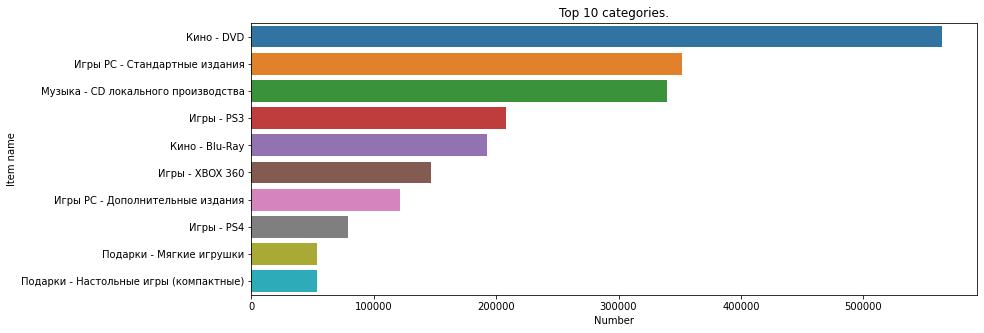

In [20]:
top_10_selling_category = df['item_category_name'].value_counts().head(10)
top_10_selling_category = top_10_selling_category.to_frame().reset_index()
top_10_selling_category.columns = ['item_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_category, x='count', y='item_name')
plt.title('Top 10 categories.')
plt.ylabel('Item name')
plt.xlabel('Number')
plt.show()

Function to plot trends from column list.

In [21]:
def plot_trend(columns):
    for column in columns:
        movies = df[df['item_category_name'] == column]
        movies = movies.groupby('date_block_num')['item_cnt_day'].sum().to_frame().reset_index()
        plt.figure(figsize=(20,4))
        plt.axhline (y =movies['item_cnt_day'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average sales for all time.')
        sns.lineplot(data=movies, x='date_block_num', y='item_cnt_day', label = 'Trend line.')
        plt.title('Propensity to buy ' + str(column) + '.', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Number of Months (from January 2013 to October 2015)')
        plt.ylabel('Products sold')
        plt.show()
        print('\n')

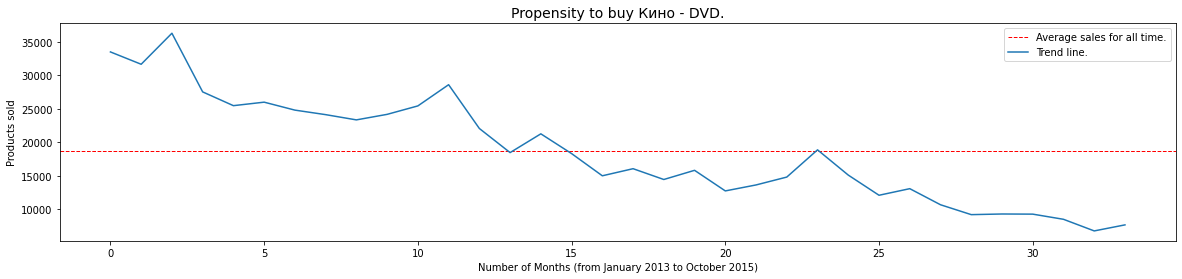

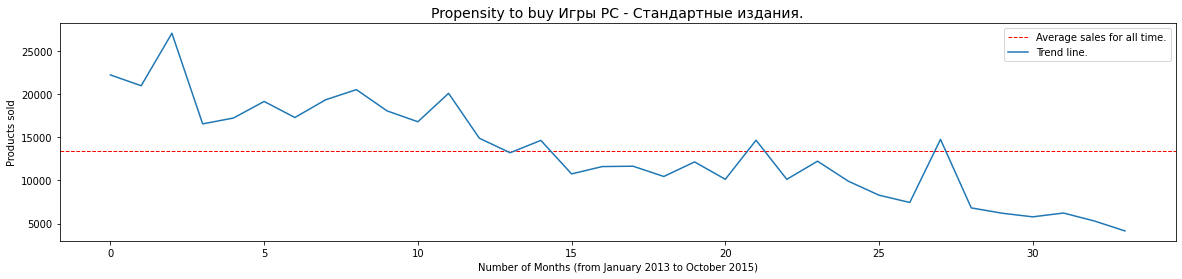

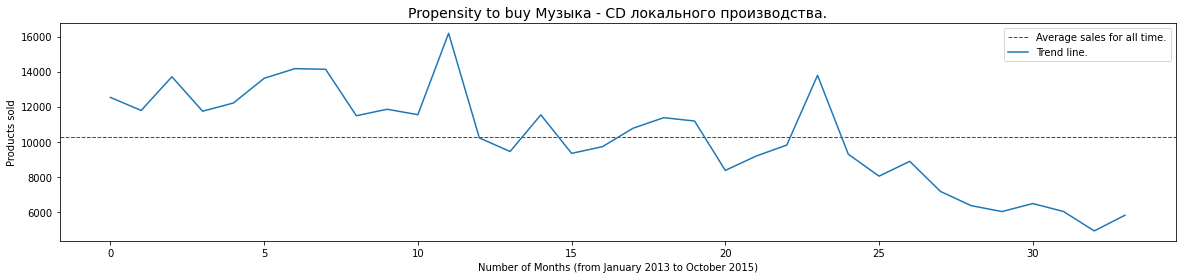

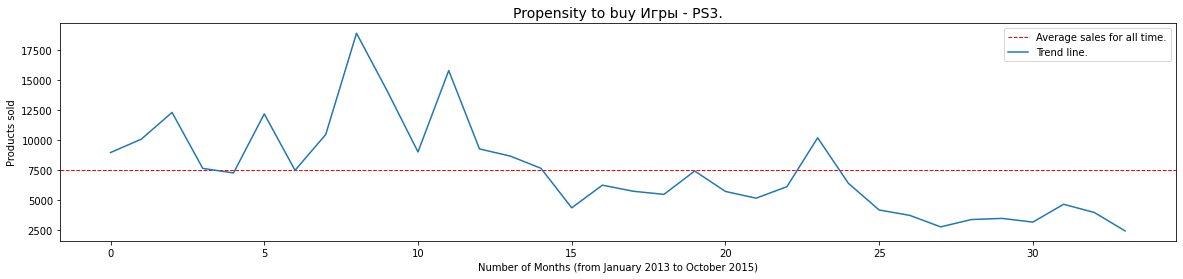

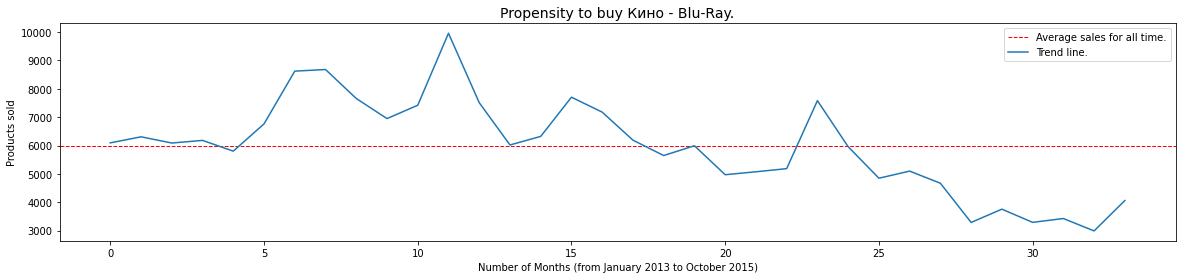

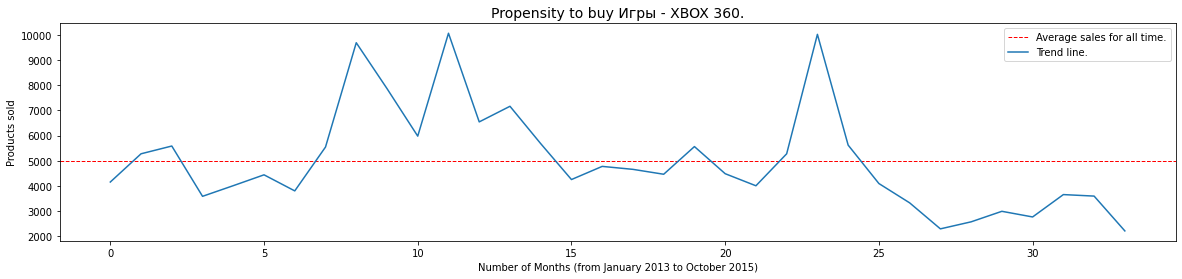

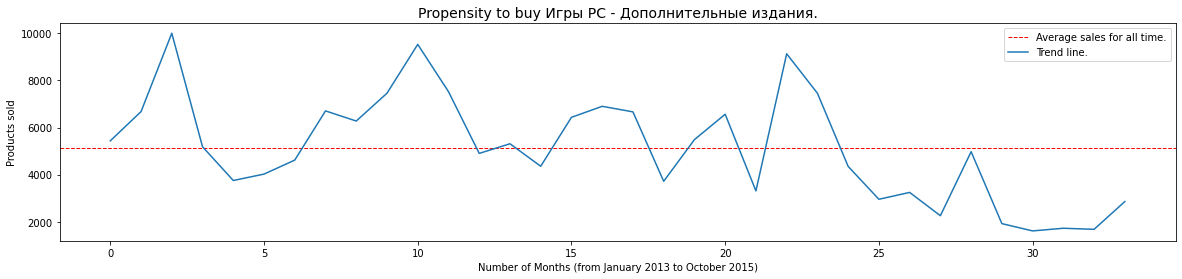

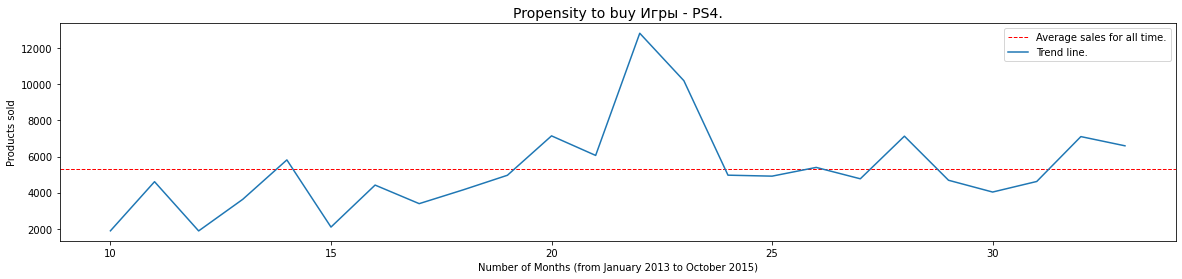

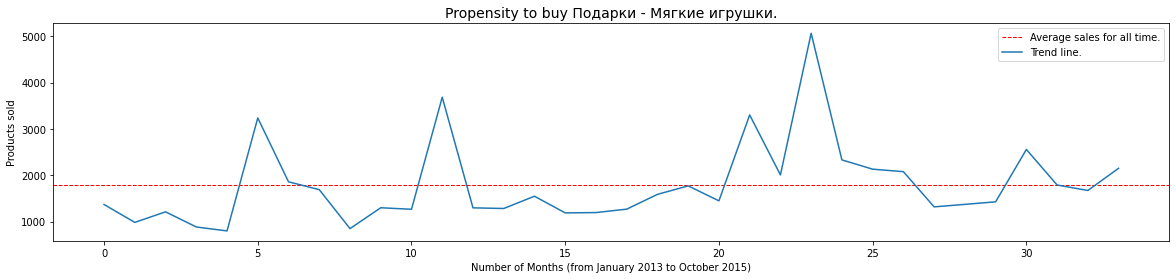

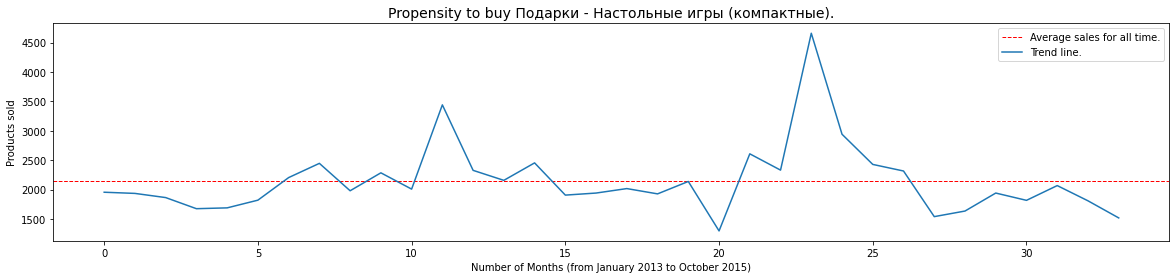

In [22]:
plot_trend(list(top_10_selling_category['item_name']))

In [8]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


# Data Modelling

In [3]:
train.drop(train[train.item_price < 0].index, inplace = True)
train.drop(train[train.item_cnt_day < 0].index, inplace = True)
train.drop(train[train.item_price >2 * train.item_price.std()].index, inplace = True)
train.drop(train[train.item_cnt_day >2 * train.item_cnt_day.std()].index, inplace = True)
train.shape

(2832501, 6)

Converting data to monthly sales data

In [4]:
# create a dataset with only monthly sales data 
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

In [5]:
data

,date,item_id,shop_id,date_block_num,item_price,item_cnt_day
0,2013-01,19,25,0,28.0,1.0
1,2013-01,27,1,0,1890.0,1.0
2,2013-01,27,2,0,2499.0,1.0
3,2013-01,27,10,0,1890.0,1.0
4,2013-01,27,19,0,2499.0,1.0
...,...,...,...,...,...,...
1573769,2015-10,22167,28,33,299.0,1.0
1573770,2015-10,22167,37,33,299.0,1.0
1573771,2015-10,22167,42,99,897.0,4.0
1573772,2015-10,22167,47,33,299.0,1.0


In [6]:
# specify the important features we want to add to the data
data = data[['date','item_id','shop_id','item_price','item_cnt_day']]

In [7]:
data

,date,item_id,shop_id,item_price,item_cnt_day
0,2013-01,19,25,28.0,1.0
1,2013-01,27,1,1890.0,1.0
2,2013-01,27,2,2499.0,1.0
3,2013-01,27,10,1890.0,1.0
4,2013-01,27,19,2499.0,1.0
...,...,...,...,...,...
1573769,2015-10,22167,28,299.0,1.0
1573770,2015-10,22167,37,299.0,1.0
1573771,2015-10,22167,42,897.0,4.0
1573772,2015-10,22167,47,299.0,1.0


In [7]:
# finally we can select specific features from the dataset that are important
data = data.pivot_table(index=['item_id','shop_id','item_price'], columns = ['date'], values = 'item_cnt_day', fill_value = 0).reset_index()

In [ ]:
data = df1.pivot_table(index=['cfips'], columns = ['Date'], values = 'microbusiness_density',fill_value = 0)


In [8]:
# looking at newly prepared dataset
data

date,item_id,shop_id,item_price,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938674,22168,2,799.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938675,22168,12,799.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938676,22168,16,799.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938677,22168,42,799.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
test.shape

(214200, 3)

In [27]:
#data2.drop(columns = [‘item_name
#data2 = data2.drop(columns = ['item_name'])

In [36]:
# check the dataset
#test.head()

# Model Building

In [7]:
x_train = data.drop(['2015-10'], axis = 1)

y_train = data['2015-10']

Delete the first column so it can predict future sales data

In [9]:
#x_test = data1.drop(['2013-01'], axis = 1)

In [11]:
# checking the shapes of datasets
print("Shape of x_train :", x_train.shape)
#print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (938679, 36)
Shape of y_test : (938679,)


In [12]:
# Let's check the x_train dataset
x_train.head()

date,item_id,shop_id,item_price,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Let's check the x_test data
#x_test.head()

In [15]:
# Split data into train and current dataset
from sklearn.model_selection import train_test_split
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0)

In [16]:
print("Shape of x_train1 :", x_train1.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_train1 :", y_train1.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train1 : (844811, 36)
Shape of x_valid : (93868, 36)
Shape of y_train1 : (844811,)
Shape of y_valid : (93868,)


# LGBMRegressor

In [17]:
# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [18]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train1, y_train1)

y_pred_lgb = model_lgb.predict(x_valid)

In [19]:
lgb_score = rmse(y_valid, y_pred_lgb)
lgb_score

0.503929541651323

# Create and send the submission file

In [43]:
model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_test)

In [44]:
y_pred_lgb = model_lgb.predict(x_test) 
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)

In [53]:
y_pred_lgb

array([0.04720039, 0.04720039, 0.04720039, ..., 0.03778676, 0.05245549,
       0.03747961])

In [45]:
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds.to_csv('submission.csv',index_label='ID')

In [ ]:
pred = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

In [192]:
pd.read_csv('submission.csv')

,ID,item_cnt_month
0,0,0.547743
1,1,0.237189
2,2,0.827377
3,3,0.277045
4,4,0.237189
...,...,...
214195,214195,0.244903
214196,214196,0.079788
214197,214197,0.079788
214198,214198,0.079788


# Stacked Models

In [20]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso
import lightgbm as lgb

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Let's assemble a model consisting of a set of basic classifiers of different types

In [22]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, random_state =42)

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,random_state=42))
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

In [23]:
model_xgb = xgb.XGBRegressor()
    #n_estimators=220, nthread = -1)
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [25]:
model_lgb = lgb.LGBMRegressor(objective='regression',n_estimators=720)
model_lgb.fit(x_train, y_train)

LGBMRegressor(n_estimators=720, objective='regression')

In [ ]:
stacked_averaged_models.fit(x_train.values, y_train)

In [ ]:
lgb_pred = model_lgb.predict(x_valid)
xgb_pred = model_xgb.predict(x_valid)
stacked_pred = stacked_averaged_models.predict(x_valid.values)

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
lgb_pred = model_lgb.predict(df_test)
xgb_pred = model_xgb.predict(df_test)
stacked_pred = stacked_averaged_models.predict(df_test.values)

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame() 
sub['Id'] = ids
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)